In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_style_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                            )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80, 22, 10),thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                            )

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                              )

    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                              )

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_style_landmarks(image, results)

        cv2.imshow('Video Capture', image)
        if cv2.waitKey(10) & 0XFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.pose_landmarks.landmark)

33

In [9]:
frame

array([[[214, 176,  65],
        [214, 175,  63],
        [212, 174,  57],
        ...,
        [ 60,  37,   1],
        [ 57,  38,   0],
        [ 66,  52,   0]],

       [[202, 164,  52],
        [209, 172,  58],
        [211, 174,  56],
        ...,
        [ 65,  43,   9],
        [ 66,  47,   7],
        [ 59,  44,   0]],

       [[198, 163,  46],
        [204, 169,  51],
        [208, 173,  53],
        ...,
        [ 66,  44,  15],
        [ 64,  46,  13],
        [ 61,  46,  10]],

       ...,

       [[  4,  21,  25],
        [  2,  18,  23],
        [  0,  14,  20],
        ...,
        [  7,   0,   9],
        [  8,   0,  10],
        [  6,   0,   9]],

       [[  5,  19,  28],
        [  9,  22,  31],
        [  6,  18,  27],
        ...,
        [ 10,   4,  12],
        [  7,   1,  10],
        [  6,   0,  10]],

       [[  1,  13,  24],
        [  9,  21,  32],
        [  8,  19,  30],
        ...,
        [ 13,  10,  15],
        [  9,   5,  13],
        [  7,   3,  12]]

In [10]:
draw_landmarks(frame,results)

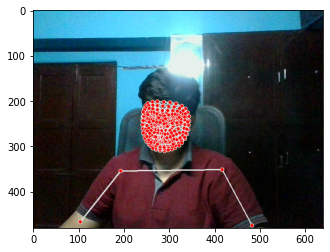

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
results.pose_landmarks.landmark

[x: 0.45611459016799927
y: 0.569227397441864
z: -0.682672381401062
visibility: 0.9997956156730652
, x: 0.4809017777442932
y: 0.5188475251197815
z: -0.6672583818435669
visibility: 0.9996090531349182
, x: 0.4956275522708893
y: 0.517834484577179
z: -0.6671733260154724
visibility: 0.9996732473373413
, x: 0.5095116496086121
y: 0.5162079334259033
z: -0.667542040348053
visibility: 0.9995742440223694
, x: 0.43846631050109863
y: 0.5153104662895203
z: -0.6500589847564697
visibility: 0.9996099472045898
, x: 0.4250553250312805
y: 0.5125203728675842
z: -0.6494897603988647
visibility: 0.9996362328529358
, x: 0.41465631127357483
y: 0.5103572607040405
z: -0.6497421860694885
visibility: 0.9995672702789307
, x: 0.5334481000900269
y: 0.5142384767532349
z: -0.4241390824317932
visibility: 0.9997055530548096
, x: 0.40019088983535767
y: 0.513313889503479
z: -0.3214821219444275
visibility: 0.9997562766075134
, x: 0.48288631439208984
y: 0.6165225505828857
z: -0.579789400100708
visibility: 0.9998165369033813
, 

In [13]:
np.array([[res.x, res.y, res.z, res.visibility]
         for res in results.pose_landmarks.landmark]).flatten()


array([ 4.56114590e-01,  5.69227397e-01, -6.82672381e-01,  9.99795616e-01,
        4.80901778e-01,  5.18847525e-01, -6.67258382e-01,  9.99609053e-01,
        4.95627552e-01,  5.17834485e-01, -6.67173326e-01,  9.99673247e-01,
        5.09511650e-01,  5.16207933e-01, -6.67542040e-01,  9.99574244e-01,
        4.38466311e-01,  5.15310466e-01, -6.50058985e-01,  9.99609947e-01,
        4.25055325e-01,  5.12520373e-01, -6.49489760e-01,  9.99636233e-01,
        4.14656311e-01,  5.10357261e-01, -6.49742186e-01,  9.99567270e-01,
        5.33448100e-01,  5.14238477e-01, -4.24139082e-01,  9.99705553e-01,
        4.00190890e-01,  5.13313890e-01, -3.21482122e-01,  9.99756277e-01,
        4.82886314e-01,  6.16522551e-01, -5.79789400e-01,  9.99816537e-01,
        4.28381026e-01,  6.16597772e-01, -5.51424623e-01,  9.99866426e-01,
        6.51699126e-01,  7.32345760e-01, -2.35310584e-01,  9.98860061e-01,
        3.02619070e-01,  7.37538874e-01, -1.76491708e-01,  9.99174356e-01,
        7.55970538e-01,  

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
extract_keypoints(results)[:-10]


array([ 0.45611459,  0.5692274 , -0.68267238, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 
                    'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
                    'hello', 'bye', 'yes', 'no', 'good morning', 'good night', 'please', 'help', 'sorry', 
                    'thank you', 'excuse me', 'okay', 'stop', 'who', 'what', 'why', 'which', 'water', 'happy', 
                    'sad', 'angry', 'afraid', 'hungry', 'good luck', 'name'])

no_sequences = 30
sequence_length = 30 #frame_length

In [22]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

: 

Collecting keypoints

In [19]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                print(results)

                draw_style_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                        
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action, sequence), (15,12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1 ,cv2.LINE_AA)

                    cv2.waitKey(2000)

                else:
                    cv2.putText(image, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action, sequence), (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                cv2.imshow('Video Capture', image)

                if cv2.waitKey(10) & 0XFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 